# Plot timeseries comparisons of aircraft and model data

This notebook will demonstrate how to plot multiple timeseries graphs, comparing aircraft pollution data to models.

## Setup imports

In [1]:
import matplotlib.pyplot as plt

import notebook_prepare as pre

## Define plotting function

In [2]:
def plot_timeseries(df,key,label,a_colour,m_colour) :

    # Define the figure.
    fig,ax = pre.setup_figure()

    # Define the data.
    time_data = df.index
    a_min, a_avg, a_max, m_min, m_avg, m_max, bl_min, bl_avg, bl_max = pre.read_data_values(df)

    # Plot the data.
    plt.plot(time_data,a_avg,lw=5,c=a_colour,label='Aircraft')
    plt.fill_between(time_data,a_min,a_max,fc=a_colour,ec=None,alpha=0.5)
    plt.plot(time_data,m_avg,lw=5,c=m_colour,label='Model')
    plt.fill_between(time_data,m_min,m_max,fc=m_colour,ec=None,alpha=0.5)

    # Set the axes labels.
    plt.xlabel('Time / UTC',fontsize=50,labelpad=10)
    plt.ylabel(label,fontsize=50,labelpad=10)

    # Set the axes ticks.
    time_ticks,time_labels = pre.calculate_time_markers(time_data)
    plt.xticks(time_ticks)
    ax.set_xticklabels(time_labels)
    ax.tick_params(labelsize=30)

    # Add a legend.
    plt.legend(fontsize=30,markerscale=2)

    #NEW
    plt.show()
    
    # Save the figure.
    #plt.savefig(plotdir+key+'_Timeseries.png')
    #plt.close()

## Specify the flight number

In [3]:
# Set the flight number.
# Current valid options are M270, M296 and M302.
flight_number = 'M296'  

## Prepare the data and plot the timeseries for each pollution species

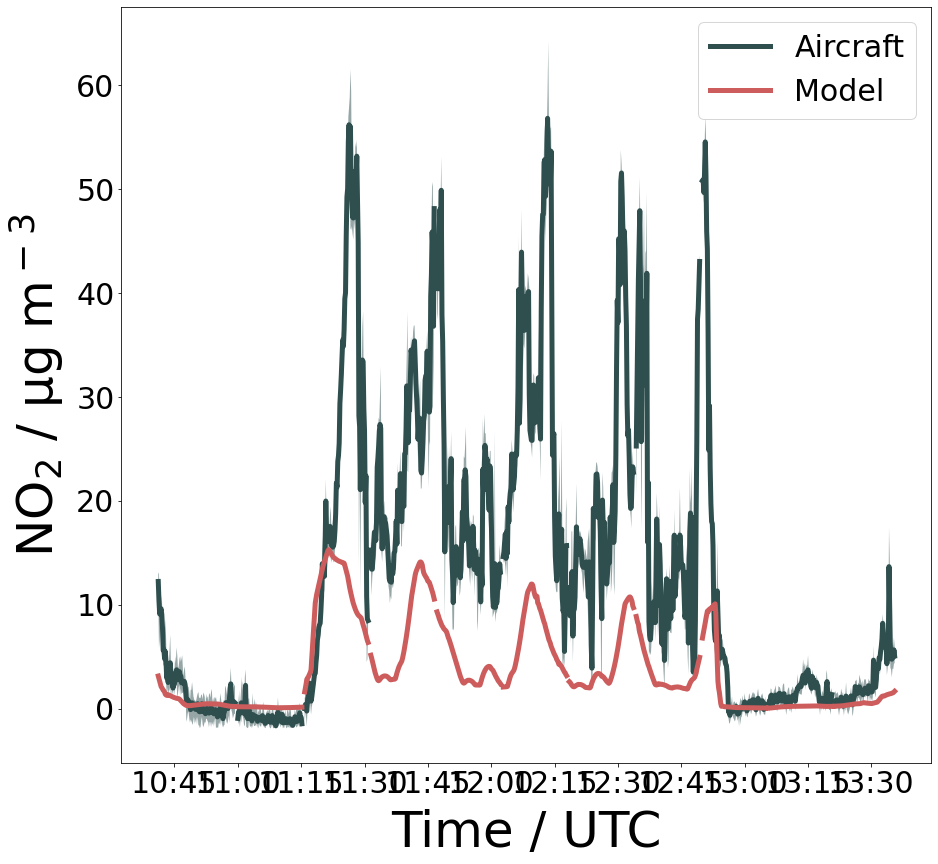

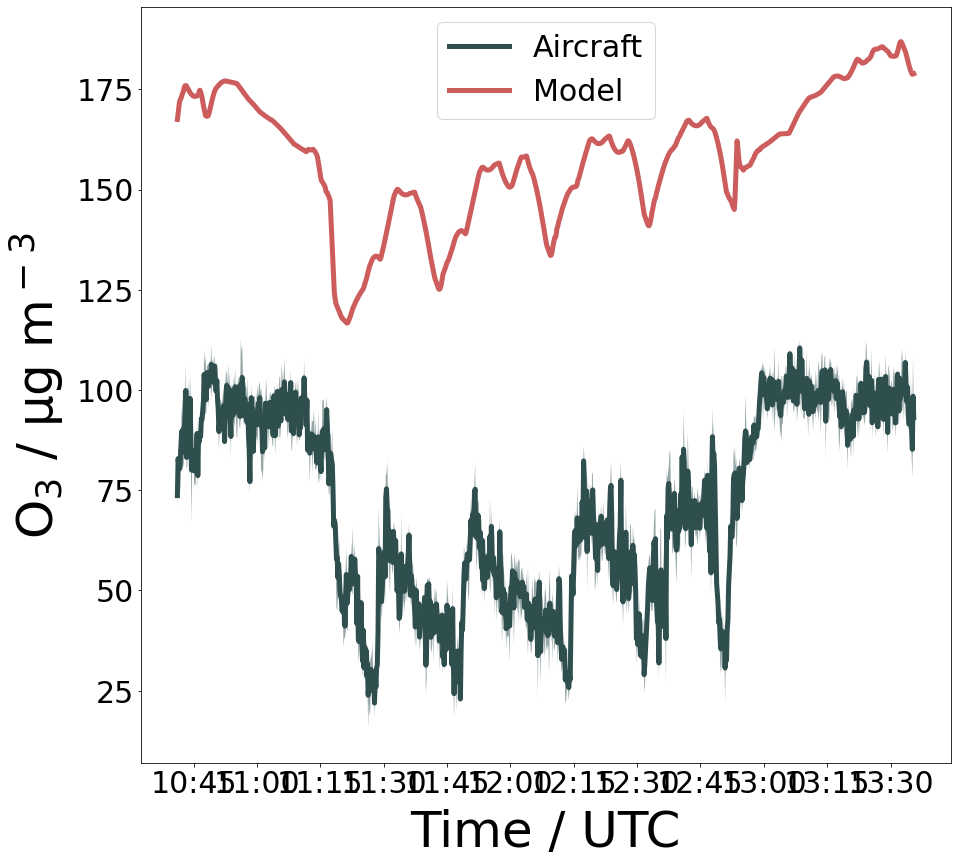

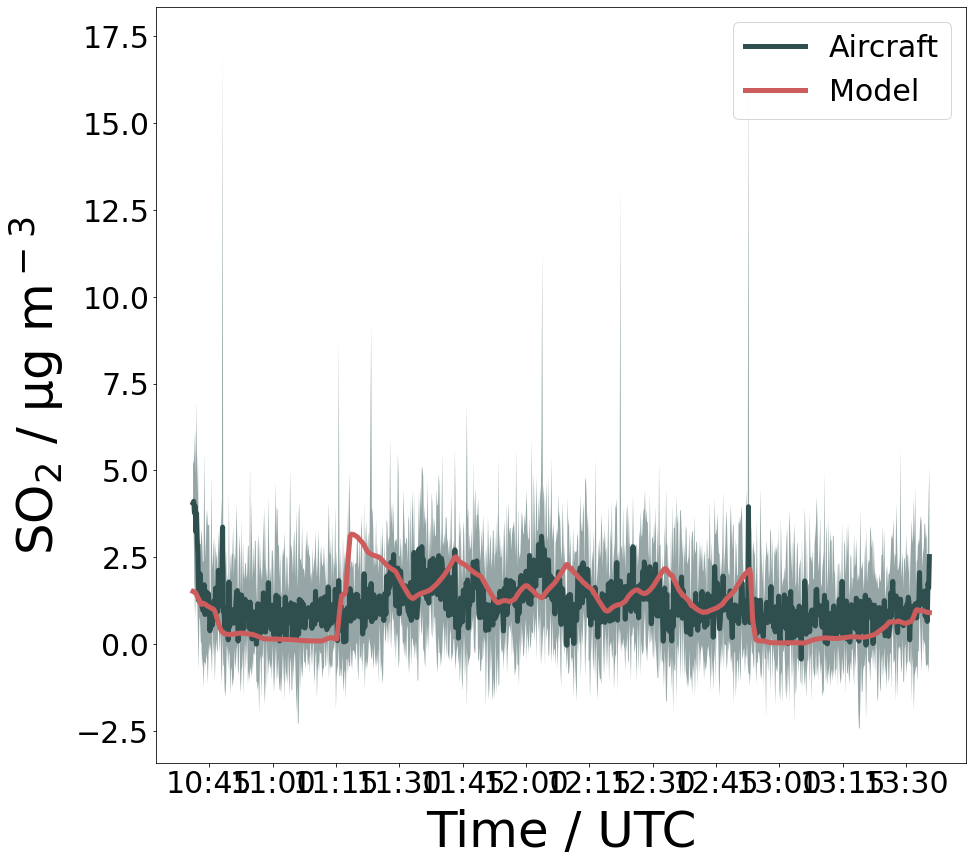

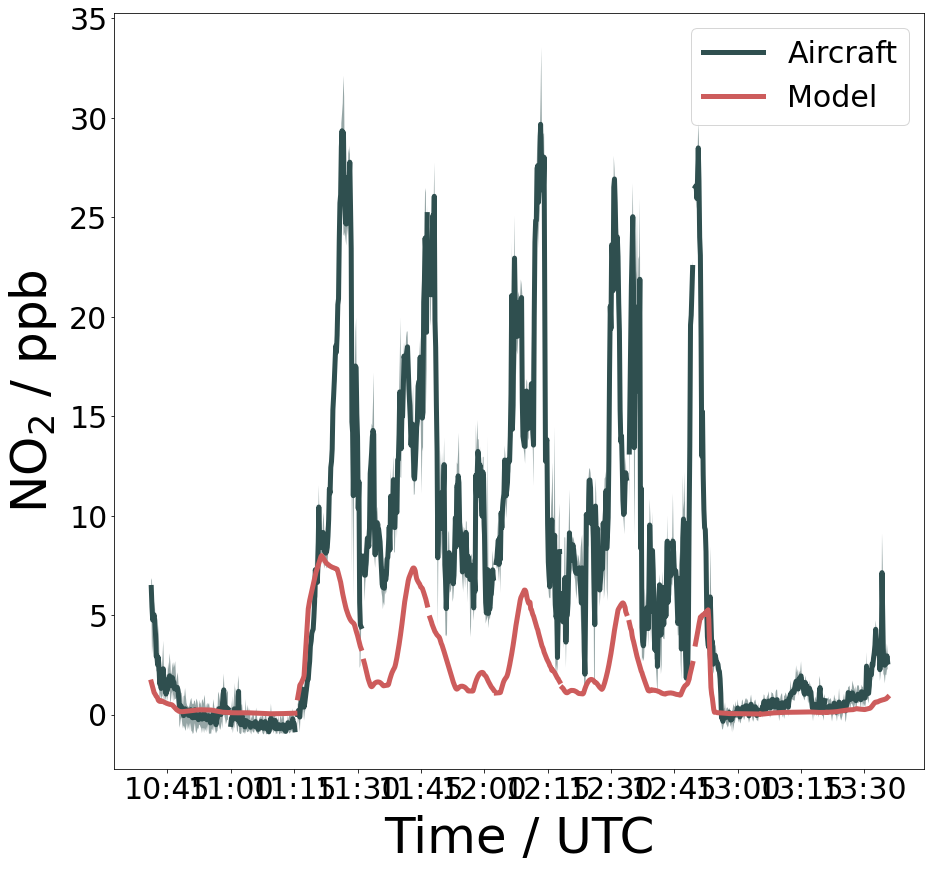

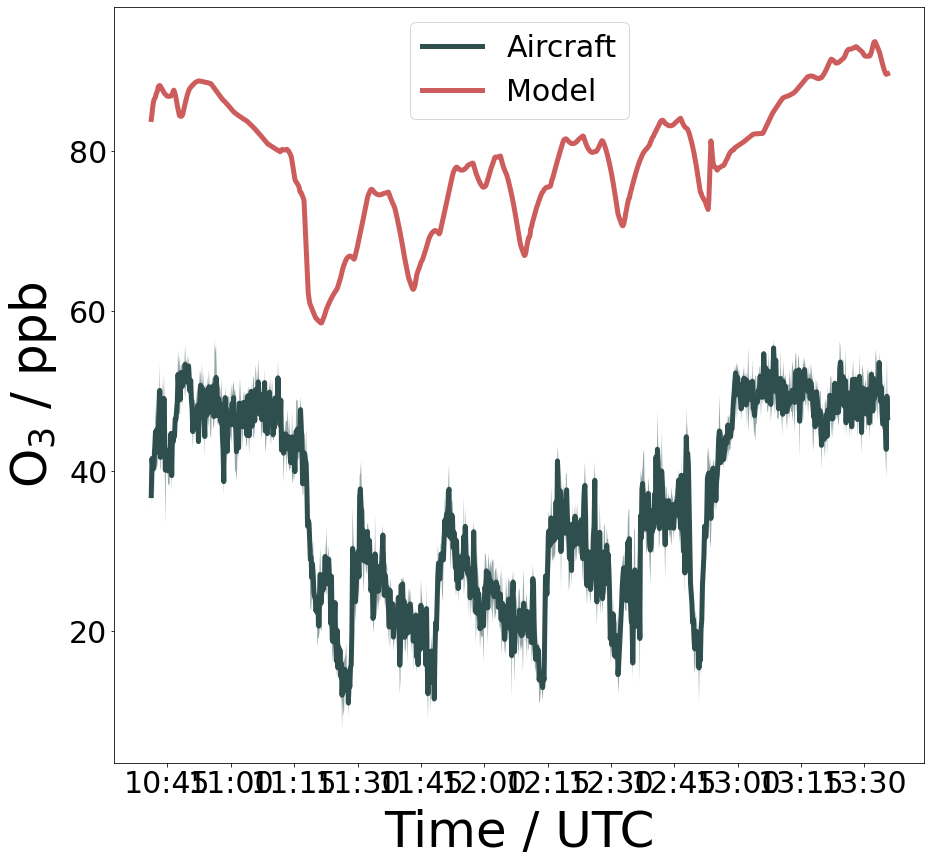

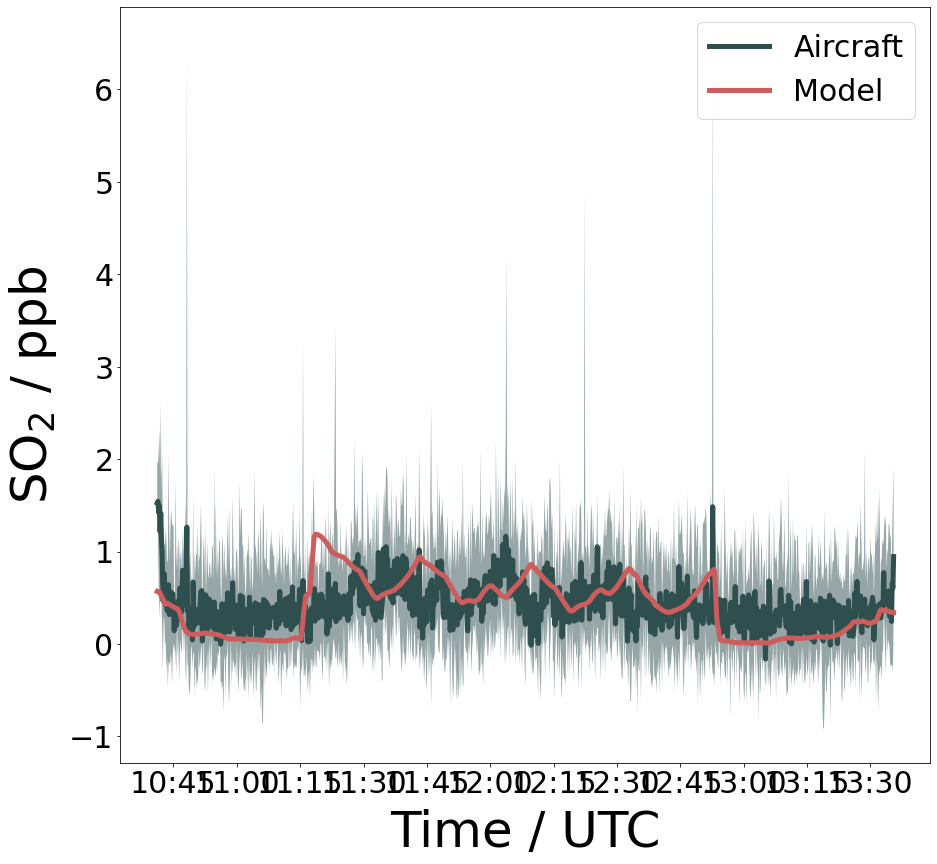

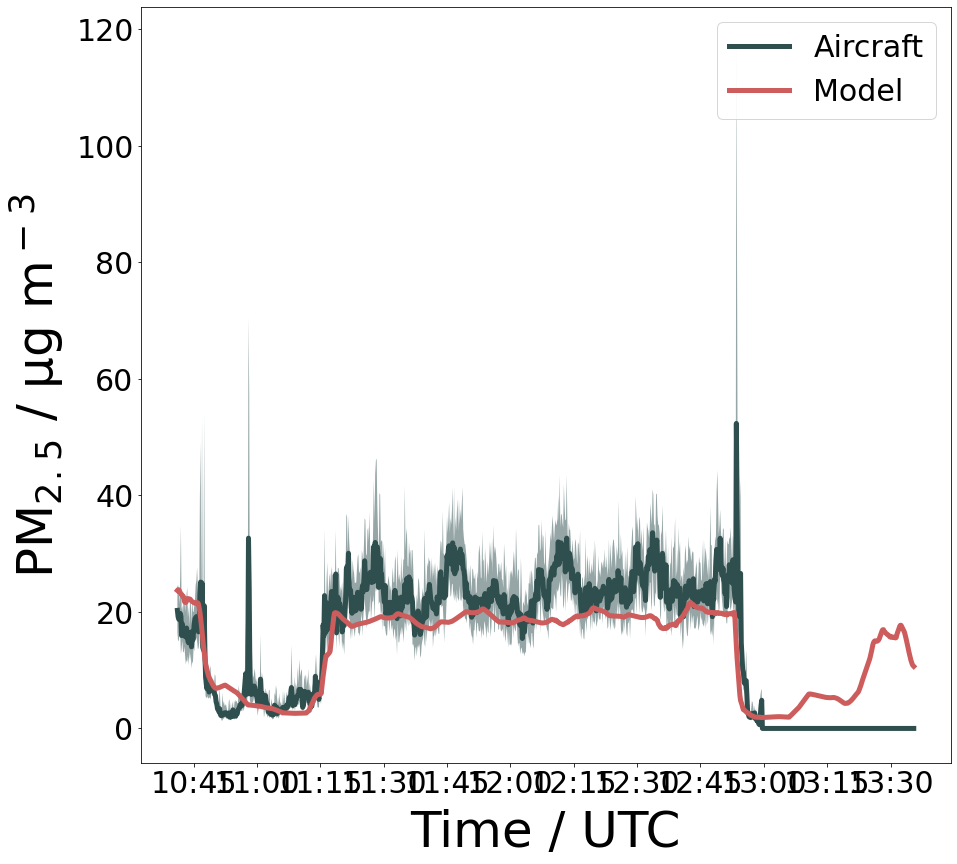

In [4]:
species_dict = pre.species_dictionary()
setup = pre.setup_notebook(flight_number)
optns = setup[6]
for key in species_dict.keys() :
    code,label,column_key,unit_conv = species_dict[key]['code'],species_dict[key]['label'],species_dict[key]['column_key'],species_dict[key]['unit_conv']

        # Combine the aircraft and model data.
    df = pre.combine_data(setup,code)

        # Resample the data.
    resample_df = pre.resample_data(df,optns['resample_time'],optns['avg_method'],optns['min_method'],optns['max_method'])
    plot_timeseries(resample_df,key,label,optns['a_colour'],optns['m_colour'])